In [5]:
# Continous live spectrogram

In [6]:
#Claude 3.7 Sonnet

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pyaudio
import time
from scipy import signal

# Audio recording parameters
CHUNK = 1024 * 2  # Number of audio samples per frame
FORMAT = pyaudio.paInt16  # Audio format
CHANNELS = 1  # Mono
RATE = 44100  # Sample rate in Hz
WINDOW_SIZE_SECONDS = 5  # Width of the spectrogram window in seconds

# Create a PyAudio object
p = pyaudio.PyAudio()

# Create a figure for visualization
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.12, top=0.95)

# Create an empty spectrogram
window_size = int(RATE * WINDOW_SIZE_SECONDS / CHUNK)  # Number of chunks to display
spectrogram_data = np.zeros((window_size, CHUNK // 2))
frequencies = np.linspace(0, RATE / 2, CHUNK // 2)  # Frequency values for y-axis

# Create an image plot
img = ax.imshow(
    spectrogram_data,
    aspect='auto',
    origin='lower',
    cmap='viridis',
    extent=[0, WINDOW_SIZE_SECONDS, 0, RATE / 2],
    vmin=0, vmax=10  # Initial dynamic range
)

# Add colorbar
cbar = fig.colorbar(img)
cbar.set_label('Magnitude (dB)')

# Add labels
ax.set_title('Real-time Audio Spectrogram')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_ylim(0, RATE / 2)  # Set y-axis to show full frequency range

# Open an audio stream
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)

def init():
    """Initialize the animation."""
    img.set_array(spectrogram_data)
    return [img]

def update(frame):
    """Update the animation frame."""
    global spectrogram_data
    
    # Read audio data
    data = np.frombuffer(stream.read(CHUNK, exception_on_overflow=False), dtype=np.int16)
    
    # Compute spectrogram using a Hann window for better frequency resolution
    f, t, Sxx = signal.spectrogram(
        data, 
        fs=RATE, 
        window='hann',
        nperseg=CHUNK,
        noverlap=CHUNK // 2,
        scaling='spectrum'
    )
    
    # Convert to dB scale (log scale)
    Sxx_db = 10 * np.log10(Sxx + 1e-10)  # Adding small value to avoid log(0)
    
    # Update the spectrogram data (slide window)
    spectrogram_data = np.roll(spectrogram_data, -1, axis=0)
    spectrogram_data[-1, :] = Sxx_db[:, 0]  # Add the new data at the end
    
    # Update dynamic range for better visualization
    vmin = np.percentile(spectrogram_data, 10)
    vmax = np.percentile(spectrogram_data, 90)
    img.set_clim(vmin, vmax)
    
    # Update the image data
    img.set_array(spectrogram_data)
    
    return [img]

# Create animation with interval of 50ms
ani = FuncAnimation(fig, update, init_func=init, blit=True, interval=50)

try:
    plt.show()
except KeyboardInterrupt:
    # Clean up on keyboard interrupt
    pass

# Clean up resources
stream.stop_stream()
stream.close()
p.terminate()

/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_1980/4044914754.py:98: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, init_func=init, blit=True, interval=50)


In [7]:
#perplexity

import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.signal import stft

# Audio parameters
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024 * 4
OVERLAP = 512
NPERSEG = CHUNK + OVERLAP

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open audio stream
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 4))
x_coords = np.linspace(0, RATE/2, NPERSEG//2)
mesh = ax.pcolormesh([], [], [], shading='auto', cmap='viridis')
ax.set_ylim(0, 5000)  # Focus on 0-5kHz range
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]')
fig.colorbar(mesh, ax=ax, label='Intensity [dB]')

# Animation function
def update(frame):
    try:
        # Read audio data
        data = stream.read(CHUNK, exception_on_overflow=False)
        audio = np.frombuffer(data, dtype=np.int16).astype(np.float32)
        
        # Compute STFT
        f, t, Zxx = stft(audio, fs=RATE, nperseg=NPERSEG)
        
        # Convert to dB scale
        Sxx = 20 * np.log10(np.abs(Zxx) + 1e-9)
        
        # Update spectrogram data
        mesh.set_array(Sxx[:len(x_coords)])
        mesh.set_extent([t.min(), t.max(), f.min(), f.max()])
        
    except Exception as e:
        print("Error:", str(e))
    
    return mesh,

# Start animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    interval=50,
    blit=True
)

plt.show()

# Cleanup
stream.stop_stream()
stream.close()
p.terminate()


ValueError: not enough values to unpack (expected 2, got 1)

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 1179, in _on_timer
    ret = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1407, in _step
    still_going = super()._step(*args)
                  ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1101, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1120, in _draw_next_frame
    self._draw_frame(framedata)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1746, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_1980/4044914754.py", line 85, in updat

Available audio input devices:
  0: MacBook Pro Microphone (Input Channels: 1)
  2: Sharing Audio (Input Channels: 2)
  3: Microsoft Teams Audio (Input Channels: 1)


Using device: MacBook Pro Microphone
Audio stream started. Recording...


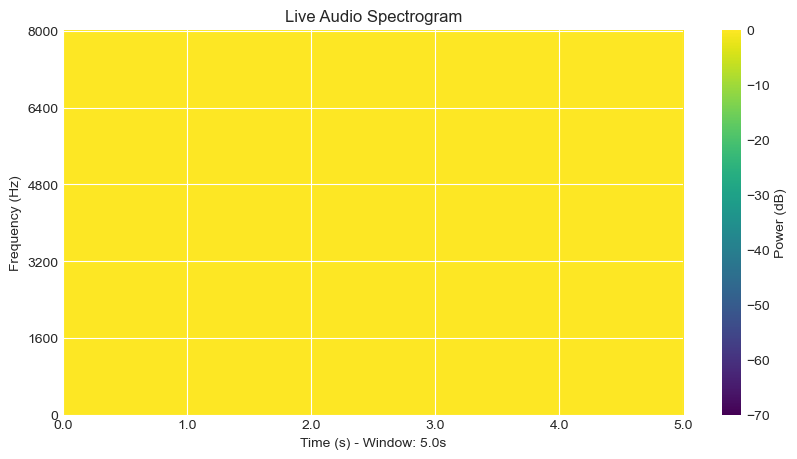

Stopping audio stream and closing PyAudio...
Done.


In [ ]:
#Gemini 2.5
import pyaudio
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

# --- Configuration ---
# Audio settings
FORMAT = pyaudio.paInt16  # Data type for audio samples (16-bit integers)
CHANNELS = 1              # Mono audio
RATE = 16000              # Samples per second (Hz). BirdNet often uses 48kHz, but 16kHz is fine for many things.
CHUNK = 1024              # Number of audio frames per buffer read.
                          # Affects latency and update frequency.

# Spectrogram Display settings
WINDOW_DURATION_SEC = 5.0 # How many seconds of audio to display in the spectrogram
UPDATE_INTERVAL_MSEC = 100 # How often to update the plot (in milliseconds)

# STFT Parameters (for scipy.signal.spectrogram)
NPERSEG = 512             # Length of each segment (window size for STFT)
                          # Power of 2 is common. Affects frequency resolution.
NOVERLAP = NPERSEG // 2   # Overlap between segments.
                          # NPERSEG - hop_length. More overlap = smoother in time.
NFFT = NPERSEG            # Length of the FFT used. Usually same as NPERSEG.

# Derived audio buffer parameters
AUDIO_BUFFER_SIZE = int(RATE * WINDOW_DURATION_SEC)
audio_buffer = np.zeros(AUDIO_BUFFER_SIZE, dtype=np.float32)

# --- PyAudio Setup ---
p = pyaudio.PyAudio()
stream = None

def get_audio_input_device_index():
    print("Available audio input devices:")
    for i in range(p.get_device_count()):
        dev_info = p.get_device_info_by_index(i)
        if dev_info['maxInputChannels'] > 0:
            print(f"  {i}: {dev_info['name']} (Input Channels: {dev_info['maxInputChannels']})")
    try:
        device_index = int(input("Enter the device index for your microphone: "))
        if p.get_device_info_by_index(device_index)['maxInputChannels'] > 0:
            return device_index
        else:
            print("Invalid device index or not an input device.")
            return None
    except (ValueError, IndexError) as e:
        print(f"Error selecting device: {e}")
        return None

input_device_index = get_audio_input_device_index()

if input_device_index is None:
    print("No valid input device selected. Exiting.")
    p.terminate()
    exit()

print(f"Using device: {p.get_device_info_by_index(input_device_index)['name']}")

try:
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    input_device_index=input_device_index,
                    frames_per_buffer=CHUNK)
except Exception as e:
    print(f"Error opening stream: {e}")
    p.terminate()
    exit()

print("Audio stream started. Recording...")

# --- Matplotlib Plot Setup ---
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn-v0_8-darkgrid') # Using a seaborn style

# Initial dummy spectrogram data (correct shape is important)
# Number of frequency bins = NFFT // 2 + 1
# Number of time bins depends on buffer size, NPERSEG, NOVERLAP
num_initial_time_bins = int(np.floor((AUDIO_BUFFER_SIZE - NPERSEG) / (NPERSEG - NOVERLAP) + 1))
if num_initial_time_bins <= 0: # Ensure at least one time bin
    num_initial_time_bins = 1

dummy_Sxx = np.zeros((NFFT // 2 + 1, num_initial_time_bins))

# Create the image object
# We use a dB scale, so values will typically be negative.
# cmap='viridis' or 'magma' or 'inferno' are good perceptually uniform colormaps.
# vmin/vmax control the color scaling. Adjust based on your mic sensitivity/environment.
im = ax.imshow(dummy_Sxx,
               aspect='auto',
               origin='lower',
               cmap='viridis',
               vmin=-70, vmax=0, # dB range for typical audio
               interpolation='bilinear') # 'nearest' or 'bilinear'

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power (dB)')

ax.set_xlabel(f"Time (s) - Window: {WINDOW_DURATION_SEC:.1f}s")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Live Audio Spectrogram")

# Set y-axis ticks to actual frequencies
freq_ticks = np.linspace(0, RATE / 2, num=6) # 6 ticks from 0 to Nyquist
ax.set_yticks(np.linspace(0, NFFT // 2, num=6)) # Pixel positions
ax.set_yticklabels([f"{f:.0f}" for f in freq_ticks])
ax.set_ylim(0, NFFT // 2 + 1) # Ensure full frequency range is shown

# Set x-axis ticks to show time relative to the window
time_ticks_sec = np.linspace(0, WINDOW_DURATION_SEC, num=6)
ax.set_xticks(np.linspace(0, num_initial_time_bins -1 , num=6)) # Pixel positions
ax.set_xticklabels([f"{t:.1f}" for t in time_ticks_sec])
ax.set_xlim(0, num_initial_time_bins - 1)


# --- Animation Function ---
def init_animation():
    """Initializes the plot for animation."""
    # This function is called once at the beginning.
    # We already set up the plot, so just return the image artist.
    return im,

def update_spectrogram(frame):
    """Called by FuncAnimation to update the plot."""
    global audio_buffer

    try:
        # Read new audio data
        raw_data = stream.read(CHUNK, exception_on_overflow=False)
        # Convert raw bytes to numpy array of int16
        data_int16 = np.frombuffer(raw_data, dtype=np.int16)
        # Normalize to float32 between -1 and 1
        data_float32 = data_int16.astype(np.float32) / 32768.0
    except IOError as e:
        print(f"Audio read error: {e}")
        return im, # Return current image if read fails

    # Roll the buffer: discard oldest CHUNK samples, make space for new
    audio_buffer = np.roll(audio_buffer, -CHUNK)
    # Add new data to the end of the buffer
    audio_buffer[-CHUNK:] = data_float32

    # Calculate spectrogram
    # 'window' argument specifies the window function (e.g., 'hann', 'hamming')
    frequencies, times, Sxx = scipy.signal.spectrogram(
        audio_buffer,
        fs=RATE,
        window='hann',
        nperseg=NPERSEG,
        noverlap=NOVERLAP,
        nfft=NFFT,
        detrend=False, # No detrending needed for typical audio
        scaling='density' # 'density' or 'spectrum'
    )

    # Convert to dB scale. Add a small epsilon to avoid log(0).
    Sxx_db = 10 * np.log10(Sxx + 1e-9)

    # Update the image data
    im.set_data(Sxx_db)

    # Update x-axis limits and labels if the number of time bins changes
    # (should be relatively stable with a rolling buffer and fixed STFT params)
    if Sxx_db.shape[1] != ax.get_xlim()[1] + 1: # +1 because xlim is (min, max_exclusive_ish)
        time_ticks_sec = np.linspace(0, WINDOW_DURATION_SEC, num=6)
        ax.set_xticks(np.linspace(0, Sxx_db.shape[1] -1, num=6))
        ax.set_xticklabels([f"{t:.1f}" for t in time_ticks_sec])
        ax.set_xlim(0, Sxx_db.shape[1] -1)

    return im,

# --- Start Animation ---
# interval is in milliseconds
ani = animation.FuncAnimation(fig,
                              update_spectrogram,
                              init_func=init_animation,
                              interval=UPDATE_INTERVAL_MSEC,
                              blit=True, # Optimizes drawing by only redrawing changed parts
                              cache_frame_data=False) # Important for continuous data


try:
    plt.show() # This will block until the window is closed
except KeyboardInterrupt:
    print("Plotting stopped by user.")
finally:
    # --- Cleanup ---
    print("Stopping audio stream and closing PyAudio...")
    if stream:
        stream.stop_stream()
        stream.close()
    p.terminate()
    print("Done.")

In [ ]:
%matplotlib qt

In [ ]:
# CELL 1 (in Jupyter Notebook):
# %matplotlib qt
# Make sure to run this cell first and install PyQt5 if needed: pip install PyQt5

# CELL 2 (in Jupyter Notebook):
import pyaudio
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# import time # Not strictly needed here as FuncAnimation handles timing

# --- Configuration ---
# Audio settings
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000 # Samples per second (Hz)
CHUNK = 1024 # Frames per buffer

# Spectrogram Display settings
WINDOW_DURATION_SEC = 5.0 # How many seconds of audio to display
UPDATE_INTERVAL_MSEC = 100 # How often to update plot (ms)

# STFT Parameters
NPERSEG = 512
NOVERLAP = NPERSEG // 2
NFFT = NPERSEG

# Derived audio buffer parameters
AUDIO_BUFFER_SIZE = int(RATE * WINDOW_DURATION_SEC)
audio_buffer = np.zeros(AUDIO_BUFFER_SIZE, dtype=np.float32)

# --- PyAudio Setup ---
p = pyaudio.PyAudio()
stream = None

def get_audio_input_device_index(p_audio_instance):
    print("Available audio input devices:")
    for i in range(p_audio_instance.get_device_count()):
        dev_info = p_audio_instance.get_device_info_by_index(i)
        if dev_info['maxInputChannels'] > 0:
            print(f"  {i}: {dev_info['name']} (Input Channels: {dev_info['maxInputChannels']})")
    try:
        device_index = int(input("Enter the device index for your microphone: "))
        if p_audio_instance.get_device_info_by_index(device_index)['maxInputChannels'] > 0:
            return device_index
        else:
            print("Invalid device index or not an input device. Exiting.")
            return None
    except (ValueError, IndexError, TypeError) as e: # Added TypeError for robustness
        print(f"Error selecting device: {e}. Exiting.")
        return None

input_device_index = get_audio_input_device_index(p)

if input_device_index is None:
    p.terminate()
    # In a notebook, raising an error might be cleaner than exit()
    raise SystemExit("No valid input device selected.")


print(f"Using device: {p.get_device_info_by_index(input_device_index)['name']}")

try:
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    input_device_index=input_device_index,
                    frames_per_buffer=CHUNK)
except Exception as e:
    print(f"Error opening stream: {e}")
    p.terminate()
    raise SystemExit(f"Stream opening failed: {e}")


print("Audio stream started. Recording...")

# --- Matplotlib Plot Setup ---
# Ensure the backend is set before this point by running %matplotlib qt (or tk)
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('seaborn-v0_8-darkgrid')

num_initial_time_bins = int(np.floor((AUDIO_BUFFER_SIZE - NPERSEG) / (NPERSEG - NOVERLAP) + 1))
if num_initial_time_bins <= 0:
    num_initial_time_bins = 1
dummy_Sxx = np.zeros((NFFT // 2 + 1, num_initial_time_bins))

im = ax.imshow(dummy_Sxx,
               aspect='auto',
               origin='lower',
               cmap='viridis',
               vmin=-70, vmax=0, # Adjust based on your mic/environment
               interpolation='bilinear')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power (dB)')

ax.set_xlabel(f"Time (s) - Window: {WINDOW_DURATION_SEC:.1f}s")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Live Audio Spectrogram (Separate Window)")

freq_ticks = np.linspace(0, RATE / 2, num=6)
ax.set_yticks(np.linspace(0, NFFT // 2, num=6))
ax.set_yticklabels([f"{f:.0f}" for f in freq_ticks])
ax.set_ylim(0, NFFT // 2 + 1)

time_ticks_sec = np.linspace(0, WINDOW_DURATION_SEC, num=6)
ax.set_xticks(np.linspace(0, num_initial_time_bins -1 , num=6))
ax.set_xticklabels([f"{t:.1f}" for t in time_ticks_sec])
ax.set_xlim(0, num_initial_time_bins - 1)


# --- Animation Function ---
def init_animation():
    return im,

def update_spectrogram(frame):
    global audio_buffer
    try:
        raw_data = stream.read(CHUNK, exception_on_overflow=False)
        data_int16 = np.frombuffer(raw_data, dtype=np.int16)
        data_float32 = data_int16.astype(np.float32) / 32768.0
    except IOError as e:
        # In a long-running notebook, might not want to print every error if they are frequent
        # print(f"Audio read error: {e}")
        return im,

    audio_buffer = np.roll(audio_buffer, -CHUNK)
    audio_buffer[-CHUNK:] = data_float32

    frequencies, times, Sxx = scipy.signal.spectrogram(
        audio_buffer,
        fs=RATE,
        window='hann',
        nperseg=NPERSEG,
        noverlap=NOVERLAP,
        nfft=NFFT,
        detrend=False,
        scaling='density'
    )
    Sxx_db = 10 * np.log10(Sxx + 1e-9)
    im.set_data(Sxx_db)

    if Sxx_db.shape[1] != ax.get_xlim()[1] + 1:
        new_time_bins = Sxx_db.shape[1]
        time_ticks_sec_dynamic = np.linspace(0, WINDOW_DURATION_SEC, num=6)
        ax.set_xticks(np.linspace(0, new_time_bins -1 , num=6))
        ax.set_xticklabels([f"{t:.1f}" for t in time_ticks_sec_dynamic])
        ax.set_xlim(0, new_time_bins -1)
    return im,


# --- Start Animation ---
ani = animation.FuncAnimation(fig,
                              update_spectrogram,
                              init_func=init_animation,
                              interval=UPDATE_INTERVAL_MSEC,
                              blit=True,
                              cache_frame_data=False)

try:
    plt.show() # This will launch the separate window and block this cell's execution.
except Exception as e:
    print(f"Plotting stopped due to an error: {e}")

print("Stopping audio stream and closing PyAudio...")
if stream and stream.is_active():
    stream.stop_stream()
if stream:
    stream.close()
if p:
    p.terminate()
print("Cleanup done.")
# --- Start Animation ---
ani = animation.FuncAnimation(fig,
                              update_spectrogram,
                              init_func=init_animation,
                              interval=UPDATE_INTERVAL_MSEC,
                              blit=True,
                              cache_frame_data=False)

try:
    plt.show() # This will launch the separate window and block this cell's execution.
except Exception as e:
    print(f"Plotting stopped due to an error: {e}")
# The finally block will run when plt.show() returns (i.e., window is closed)
# or if an exception occurs in plt.show() (less common with standard backends).
# If you interrupt the kernel, the finally block might not run.
finally:
    print("Stopping audio stream and closing PyAudio...")
    if stream and stream.is_active():
        stream.stop_stream()
    if stream:
        stream.close()
    if p:
        p.terminate()
    print("Cleanup done.")

Available audio input devices:
  0: MacBook Pro Microphone (Input Channels: 1)
  2: Sharing Audio (Input Channels: 2)
  3: Microsoft Teams Audio (Input Channels: 1)
Using device: MacBook Pro Microphone
Audio stream started. Recording...
Stopping audio stream and closing PyAudio...
Cleanup done.


In [ ]:
#gemini 2.5 with extra questions
import pyaudio
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys # For flushing output

# --- Configuration ---
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
CHUNK = 1024

WINDOW_DURATION_SEC = 5.0
UPDATE_INTERVAL_MSEC = 100 # Plot update interval

NPERSEG = 512
NOVERLAP = NPERSEG // 2
NFFT = NPERSEG

AUDIO_BUFFER_SIZE = int(RATE * WINDOW_DURATION_SEC)
audio_buffer = np.zeros(AUDIO_BUFFER_SIZE, dtype=np.float32)

# --- Global variables for PyAudio and plot elements ---
p = None
stream = None
fig = None
ani = None # Keep a reference to ani to prevent garbage collection

def get_audio_input_device_index(p_audio_instance):
    print("Available audio input devices:")
    for i in range(p_audio_instance.get_device_count()):
        dev_info = p_audio_instance.get_device_info_by_index(i)
        if dev_info['maxInputChannels'] > 0:
            print(f"  {i}: {dev_info['name']} (Input Channels: {dev_info['maxInputChannels']})")
    try:
        device_index_str = input("Enter the device index for your microphone (or press Enter to try default): ")
        if not device_index_str: # User pressed Enter
            # Try to find a default input device
            default_device_info = p_audio_instance.get_default_input_device_info()
            print(f"No index entered, using default input device: {default_device_info['name']} (Index: {default_device_info['index']})")
            return default_device_info['index']
        device_index = int(device_index_str)
        if p_audio_instance.get_device_info_by_index(device_index)['maxInputChannels'] > 0:
            return device_index
        else:
            print("Invalid device index or not an input device.")
            return None
    except (ValueError, IndexError, TypeError, OSError) as e: # Added OSError for cases like no default device
        print(f"Error selecting device: {e}.")
        return None

def init_animation():
    print("Initializing animation...")
    sys.stdout.flush()
    # im is defined in the main scope, accessible here
    return im,

def update_spectrogram(frame):
    global audio_buffer, stream # Ensure we're using the global stream

    if not stream or not stream.is_active():
        print("Stream is not active. Stopping updates.")
        sys.stdout.flush()
        if ani: # Access global ani
            ani.event_source.stop() # Stop the animation if stream dies
        return im,

    # print(f"Update frame: {frame}, Stream active: {stream.is_active()}") # Can be very verbose
    # sys.stdout.flush()
    try:
        # Temporarily use exception_on_overflow=True for debugging
        raw_data = stream.read(CHUNK, exception_on_overflow=True)
        data_int16 = np.frombuffer(raw_data, dtype=np.int16)
        data_float32 = data_int16.astype(np.float32) / 32768.0
    except IOError as e:
        print(f"Audio read error: {e}. Stream active: {stream.is_active() if stream else 'N/A'}")
        sys.stdout.flush()
        # If many errors, consider stopping:
        # if ani: ani.event_source.stop()
        return im, # Return current image if read fails

    audio_buffer = np.roll(audio_buffer, -CHUNK)
    audio_buffer[-CHUNK:] = data_float32

    try:
        frequencies, times, Sxx = scipy.signal.spectrogram(
            audio_buffer,
            fs=RATE,
            window='hann',
            nperseg=NPERSEG,
            noverlap=NOVERLAP,
            nfft=NFFT,
            detrend=False,
            scaling='density'
        )
        Sxx_db = 10 * np.log10(Sxx + 1e-9)
    except Exception as e:
        print(f"Error in spectrogram calculation: {e}")
        sys.stdout.flush()
        return im,

    im.set_data(Sxx_db)

    # Dynamic x-axis update (less critical for initial debugging if it causes issues)
    if Sxx_db.shape[1] != ax.get_xlim()[1] + 1:
        new_time_bins = Sxx_db.shape[1]
        if new_time_bins > 0: # Ensure there's at least one bin
            time_ticks_sec_dynamic = np.linspace(0, WINDOW_DURATION_SEC, num=min(6, new_time_bins))
            ax.set_xticks(np.linspace(0, new_time_bins - 1, num=min(6, new_time_bins)))
            ax.set_xticklabels([f"{t:.1f}" for t in time_ticks_sec_dynamic])
            ax.set_xlim(0, new_time_bins - 1)
    return im,

def run_spectrogram():
    global p, stream, fig, ax, im, ani # Declare globals we'll assign

    print("Starting spectrogram script...")
    sys.stdout.flush()

    p = pyaudio.PyAudio()

    input_device_index = get_audio_input_device_index(p)

    if input_device_index is None:
        print("Failed to get a valid input device. Terminating PyAudio.")
        sys.stdout.flush()
        p.terminate()
        return # Exit the function

    print(f"Using device: {p.get_device_info_by_index(input_device_index)['name']}")
    sys.stdout.flush()

    try:
        stream = p.open(format=FORMAT,
                        channels=CHANNELS,
                        rate=RATE,
                        input=True,
                        input_device_index=input_device_index,
                        frames_per_buffer=CHUNK)
        print(f"Audio stream opened. Stream active: {stream.is_active()}")
        sys.stdout.flush()
    except Exception as e:
        print(f"Error opening stream: {e}")
        sys.stdout.flush()
        p.terminate()
        return

    # --- Matplotlib Plot Setup ---
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.style.use('seaborn-v0_8-darkgrid')

    num_initial_time_bins = int(np.floor((AUDIO_BUFFER_SIZE - NPERSEG) / (NPERSEG - NOVERLAP) + 1))
    if num_initial_time_bins <= 0: num_initial_time_bins = 1
    dummy_Sxx = np.zeros((NFFT // 2 + 1, num_initial_time_bins))

    im = ax.imshow(dummy_Sxx, aspect='auto', origin='lower', cmap='viridis',
                   vmin=-70, vmax=0, interpolation='bilinear')
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Power (dB)')
    ax.set_xlabel(f"Time (s) - Window: {WINDOW_DURATION_SEC:.1f}s")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title("Live Audio Spectrogram (Separate Window)")

    freq_ticks = np.linspace(0, RATE / 2, num=6)
    ax.set_yticks(np.linspace(0, NFFT // 2, num=6))
    ax.set_yticklabels([f"{f:.0f}" for f in freq_ticks])
    ax.set_ylim(0, NFFT // 2 + 1)

    if num_initial_time_bins > 0:
        time_ticks_sec = np.linspace(0, WINDOW_DURATION_SEC, num=min(6, num_initial_time_bins))
        ax.set_xticks(np.linspace(0, num_initial_time_bins - 1, num=min(6, num_initial_time_bins)))
        ax.set_xticklabels([f"{t:.1f}" for t in time_ticks_sec])
        ax.set_xlim(0, num_initial_time_bins - 1)

    print("Setting up animation...")
    sys.stdout.flush()
    ani = animation.FuncAnimation(fig,
                                  update_spectrogram,
                                  init_func=init_animation,
                                  interval=UPDATE_INTERVAL_MSEC,
                                  blit=False, # TRY BLIT=FALSE
                                  cache_frame_data=False,
                                  # frames=None # Let it run indefinitely
                                  # save_count=0 # For FuncAnimation, not directly relevant here unless saving
                                 )
    print("Animation object created. Calling plt.show()...")
    sys.stdout.flush()

    try:
        plt.show() # This should block until the window is closed
        print("plt.show() has returned (window closed).")
        sys.stdout.flush()
    except Exception as e:
        print(f"Plotting stopped due to an error during plt.show(): {e}")
        sys.stdout.flush()
    finally:
        print("Finally block reached. Stopping audio stream and closing PyAudio...")
        sys.stdout.flush()
        if stream:
            if stream.is_active():
                print("Stream is active, stopping stream...")
                sys.stdout.flush()
                stream.stop_stream()
            print("Closing stream...")
            sys.stdout.flush()
            stream.close()
            stream = None # Clear reference
        if p:
            print("Terminating PyAudio...")
            sys.stdout.flush()
            p.terminate()
            p = None # Clear reference
        print("Cleanup done.")
        sys.stdout.flush()

# --- Run the main function ---
if __name__ == "__main__": # This check is mostly for scripts, but good practice
    run_spectrogram()
else: # Assuming running in Jupyter, just call it
    run_spectrogram()

Starting spectrogram script...
Available audio input devices:
  0: MacBook Pro Microphone (Input Channels: 1)
  2: Sharing Audio (Input Channels: 2)
  3: Microsoft Teams Audio (Input Channels: 1)
Using device: MacBook Pro Microphone
Audio stream opened. Stream active: True
Setting up animation...
Animation object created. Calling plt.show()...
plt.show() has returned (window closed).
Finally block reached. Stopping audio stream and closing PyAudio...
Stream is active, stopping stream...
Closing stream...
Terminating PyAudio...
Cleanup done.


Initializing animation...
Stream is not active. Stopping updates.


In [ ]:
#%matplotlib inline
%matplotlib qt
#------------------------Spectrogram Generator----------------------

import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from scipy import signal
import time


# Set the audio parameters
RATE = 44100
CHUNK = 1024
DURATION = 0.1
MAX_FRAMES = 500

# Initialize PyAudio and open the audio stream
p = pyaudio.PyAudio()
stream = p.open(
    format=pyaudio.paInt16,
    channels=1,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)

# Create the figure and axes for the plot
fig, ax = plt.subplots()

# Function to update the spectrogram
def update_spectrogram(frame):
    audio_array = np.frombuffer(stream.read(CHUNK), dtype=np.int16)
    frequencies, times, Sxx = signal.spectrogram(audio_array, RATE)
    ax.clear()
    ax.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='inferno')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [s]')
    ax.set_title('Spectrogram')
    return ax,


# Create the animation
ani = animation.FuncAnimation(fig, update_spectrogram, frames=None, interval=DURATION * 1000, blit=True, save_count=MAX_FRAMES)

# Show the plot
plt.show()

# Save the animation as a GIF file
#ani.save('live_spectrogram.gif', writer=PillowWriter(fps=24))

# Close the audio stream
time.sleep(3)
stream.stop_stream()
stream.close()
p.terminate()

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py", line 298, in process
    func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 892, in _start
    self._init_draw()
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1727, in _init_draw
    self._draw_frame(frame_data)
  File "/opt/anaconda3/lib/python3.12/site-packages/matplotlib/animation.py", line 1746, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_1980/3852612511.py", line 36, in update_spectrogram
    audio_array = np.frombuffer(stream.read(CHUNK), dtype=np.int16)
                                ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pyaudio/__init__.py", line 570, in read
    return pa.read_stream(self._

In [1]:
%matplotlib notebook
'''
pip install pyAudio may not work
Instead download and install a wheel from here:
https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyaudio

or use: 

pip install pipwin
pipwin install pyaudio

pipwin is like pip, but it installs precompiled Windows binaries provided by Christoph Gohlke.
'''

# to display in separate Tk window
import matplotlib
matplotlib.use('TkAgg')

import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.fftpack import fft
import time
from tkinter import TclError

# Counts the frames
# why the list? https://stackoverflow.com/questions/25040323/unable-to-reference-one-particular-variable-declared-outside-a-function
count = [0]

# ------------ Audio Setup ---------------
# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second
# Signal range is -32k to 32k
# limiting amplitude to +/- 4k
AMPLITUDE_LIMIT = 4096

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
	format=FORMAT,
	channels=CHANNELS,
	rate=RATE,
	input=True,
	output=True,
	frames_per_buffer=CHUNK
)

# ------------ Plot Setup ---------------
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # frequencies (spectrum)

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# create semilogx line for spectrum, to plot the waveform as log not lin
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), '-', lw=2)

# format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# format spectrum axes
ax2.set_xlim(20, RATE / 2)
print('stream started')

def on_close(evt):
	print("Closing")
	# calculate average frame rate
	frame_rate = count[0] / (time.time() - start_time)
	
	# Close the stream and terminate pyAudio
	stream.stop_stream()
	stream.close()
	p.terminate()
	print('stream stopped')
	print('average frame rate = {:.0f} FPS'.format(frame_rate))
	quit()


def animate(i):
	# binary data
	data = stream.read(CHUNK)  
	# Open in numpy as a buffer
	data_np = np.frombuffer(data, dtype='h')

	# Update the line graph
	line.set_ydata(data_np)
	
	# compute FFT and update line
	yf = fft(data_np)
	# The fft will return complex numbers, so np.abs will return their magnitude

	line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (512 * CHUNK))

	# Update the number of frames
	count[0] += 1

if __name__ == '__main__':
	start_time = time.time()

	anim = animation.FuncAnimation(fig, animate, blit=False, interval=1)
	fig.canvas.mpl_connect('close_event',  on_close)
	plt.show()	

stream started


/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_2643/3131791198.py:115: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, animate, blit=False, interval=1)
